## 🌀 Fase Quântica, estados e portas relacionadas

Um dos conceitos mais importantes (e sutis) da mecânica quântica é a **fase quântica**. Enquanto as probabilidades $|𝛼|²$ e $|𝛽|²$ determinam os resultados da medição, a **fase relativa** entre as amplitudes é crucial para fenômenos de interferência.

### Fase Global vs. Fase Relativa

Números complexos podem ser escritos na forma polar:

$$𝛼 = |𝛼| e^{i\phi}$$

onde $\phi$ é a fase do número complexo.

- **Fase Global**: Se multiplicarmos todo o estado por $e^{i\theta}$, isso não tem efeito observável:
  $$e^{i\theta}(𝛼|0⟩ + 𝛽|1⟩) \equiv 𝛼|0⟩ + 𝛽|1⟩$$

- **Fase Relativa**: A diferença de fase entre $𝛼$ e $𝛽$ **é observável** através de interferência (vamos ver esse assunto depois):
  $$\frac{1}{\sqrt{2}}(|0⟩ + |1⟩) \neq \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$$

### Estados importantes com diferentes fases

- $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$ — fase relativa 0°
- $|-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩)$ — fase relativa 180°
- $|i+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩)$ — fase relativa 90°
- $|i-⟩ = \frac{1}{\sqrt{2}}(|0⟩ - i|1⟩)$ — fase relativa 270°

### Portas que modificam fase

- **Porta Z**: Adiciona fase de 180° ao estado |1⟩
  $$Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$$

- **Porta S**: Adiciona fase de 90° ao estado |1⟩
  $$S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}$$

- **Porta T**: Adiciona fase de 45° ao estado |1⟩
  $$T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}$$

In [1]:
# Importações para visualização da esfera de Bloch
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit.quantum_info import Statevector
from sympy import Matrix, symbols       # Para criar matrizes e símbolos matemáticos
from IPython.display import display, Markdown

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definir as portas de fase
Z = Matrix([[1, 0],
            [0, -1]])

S = Matrix([[1, 0],
            [0, sp.I]])

T = Matrix([[1, 0],
            [0, sp.exp(sp.I * sp.pi / 4)]])

display(Markdown(f"$ Z = {sp.latex(Z)} $"))
display(Markdown(f"$ S = {sp.latex(S)} $"))
display(Markdown(f"$ T = {sp.latex(T)} $"))

$ Z = \left[\begin{matrix}1 & 0\\0 & -1\end{matrix}\right] $

$ S = \left[\begin{matrix}1 & 0\\0 & i\end{matrix}\right] $

$ T = \left[\begin{matrix}1 & 0\\0 & e^{\frac{i \pi}{4}}\end{matrix}\right] $

### Visualização na Esfera de Bloch

A esfera de Bloch é uma representação geométrica de um qubit onde:
- **Polo Norte** = |0⟩
- **Polo Sul** = |1⟩
- **Eixo +X** = |+⟩ (fase 0°)
- **Eixo -X** = |-⟩ (fase 180°)
- **Eixo +Y** = |i+⟩ (fase 90°)
- **Eixo -Y** = |i-⟩ (fase 270°)

Vamos visualizar estados com diferentes fases:

Estado |+⟩ (Fase 0°) - Eixo +X:


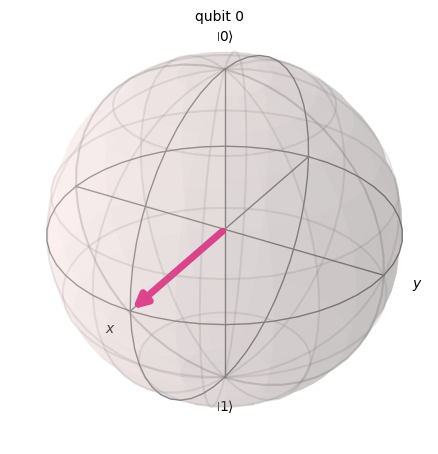


Estado |-⟩ (Fase 180°) - Eixo -X:


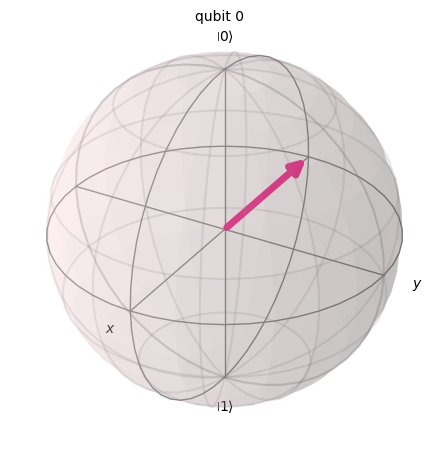


Estado |i+⟩ (Fase 90°) - Eixo +Y:


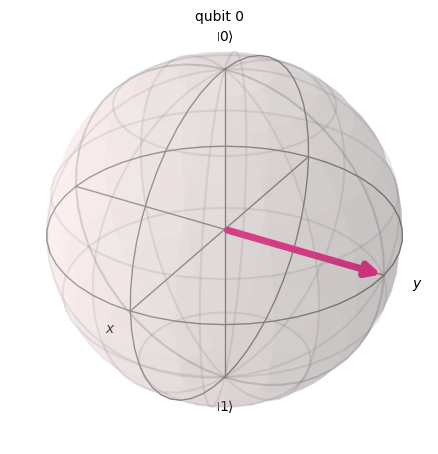


Estado |i-⟩ (Fase 270°) - Eixo -Y:


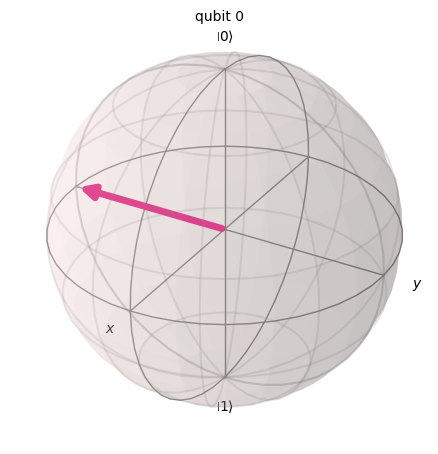


Observe como todos os estados estão no equador da esfera de Bloch
(igual probabilidade de medir 0 ou 1), mas em direções diferentes.


In [2]:
# Statevector do Qiskit serve para visualização. 
# Vai ajudar a montrar a esfera de Bloch.
# Ele aceita listas com os coeficientes dos estados |0⟩ e |1⟩, neste caso
# aqueles alfa e beta que vimos antes.

# Aqui, alfa e beta são ambos 1/√2 para o estado |+⟩

# Estado |+⟩ = H|0⟩ (fase 0°)
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])

# Estado |-⟩ = H|1⟩ = Z|+⟩ (fase 180°)
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

# Estado |i+⟩ = S|+⟩ (fase 90°)
state_i_plus = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

# Estado |i-⟩ (fase 270°)
state_i_minus = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])

# Visualizar na esfera de Bloch
print("Estado |+⟩ (Fase 0°) - Eixo +X:")
display(plot_bloch_multivector(state_plus))

print("\nEstado |-⟩ (Fase 180°) - Eixo -X:")
display(plot_bloch_multivector(state_minus))

print("\nEstado |i+⟩ (Fase 90°) - Eixo +Y:")
display(plot_bloch_multivector(state_i_plus))

print("\nEstado |i-⟩ (Fase 270°) - Eixo -Y:")
display(plot_bloch_multivector(state_i_minus))

print("\nObserve como todos os estados estão no equador da esfera de Bloch")
print("(igual probabilidade de medir 0 ou 1), mas em direções diferentes.")

### Demonstração: Efeito da Porta Z

A porta Z inverte a fase do estado |1⟩:

$$Z|+⟩ = Z · \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) = \frac{1}{\sqrt{2}}(|0⟩ - |1⟩) = |-⟩$$

Na esfera de Bloch, isso corresponde a uma rotação de 180° em torno do eixo Z.

Antes de aplicar a porta Z:


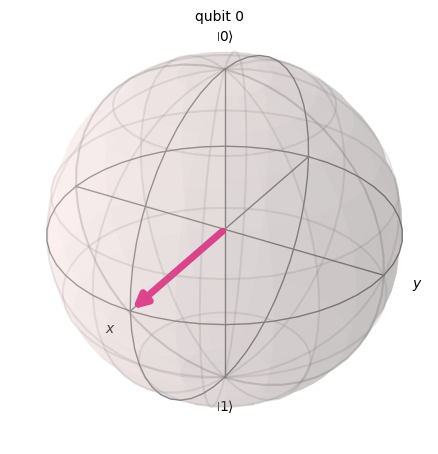


Depois de aplicar a porta Z:


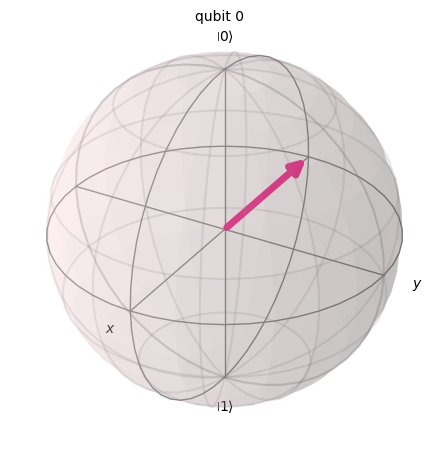


A porta Z rotacionou o estado de +X para -X (180° em torno do eixo Z)


In [3]:
# Demonstração: Aplicar porta Z em |+⟩
estado_inicial = state_plus
estado_apos_Z = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])

print("Antes de aplicar a porta Z:")
display(plot_bloch_multivector(estado_inicial))

print("\nDepois de aplicar a porta Z:")
display(plot_bloch_multivector(estado_apos_Z))

print("\nA porta Z rotacionou o estado de +X para -X (180° em torno do eixo Z)")

### Demonstração: Efeito da Porta S

A porta S adiciona uma fase de 90° ao estado |1⟩:

$$S|+⟩ = S · \frac{1}{\sqrt{2}}(|0⟩ + |1⟩) = \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩) = |i+⟩$$

Na esfera de Bloch, isso corresponde a uma rotação de 90° em torno do eixo Z.

Antes de aplicar a porta S:


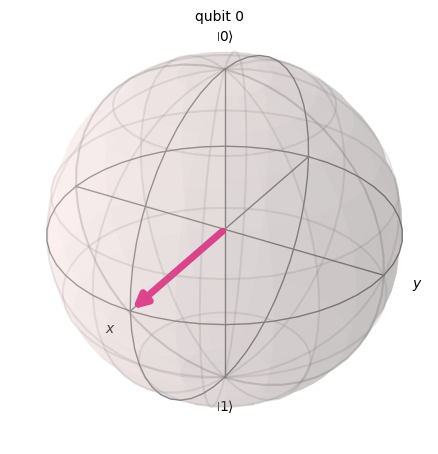


Depois de aplicar a porta S:


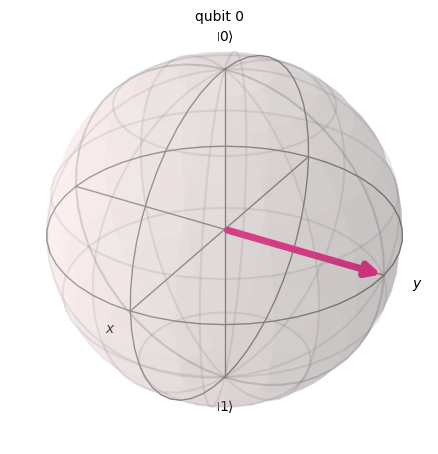


A porta S rotacionou o estado de +X para +Y (90° em torno do eixo Z)


In [4]:
# Demonstração: Aplicar porta S em |+⟩
estado_inicial = state_plus
estado_apos_S = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])

print("Antes de aplicar a porta S:")
display(plot_bloch_multivector(estado_inicial))

print("\nDepois de aplicar a porta S:")
display(plot_bloch_multivector(estado_apos_S))

print("\nA porta S rotacionou o estado de +X para +Y (90° em torno do eixo Z)")

### Visualização com Q-Sphere

O Q-Sphere é outra forma de visualizar estados quânticos, onde as **cores** representam as fases:
- **Verde/Azul claro**: Fase positiva (0° a 90°)
- **Vermelho/Laranja**: Fase negativa (180° a 270°)
- **Tamanho das esferas**: Magnitude da amplitude

Estado |+⟩ - Fase 0°:


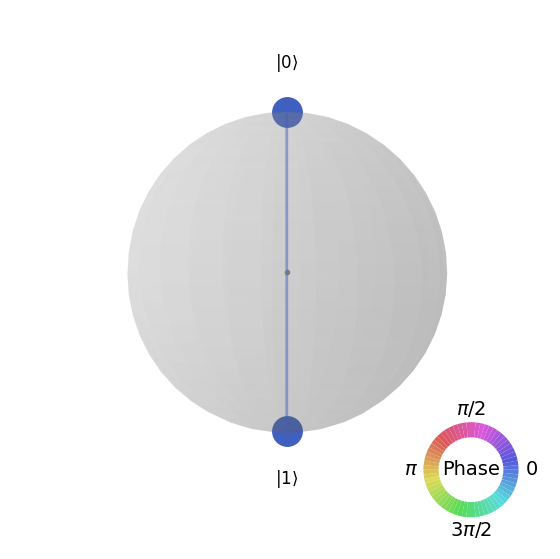


Estado |-⟩ - Fase 180°:


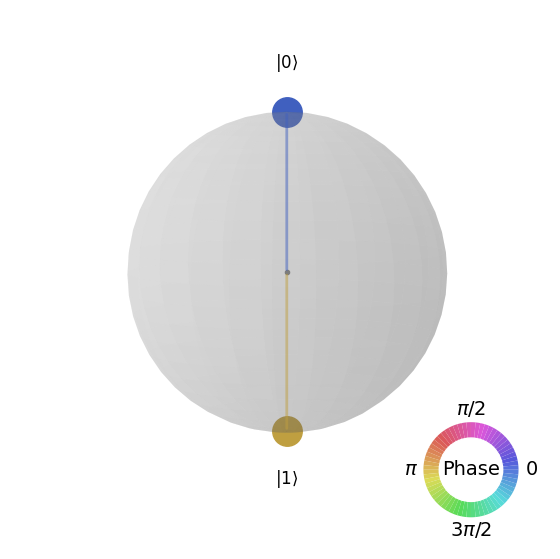


Estado |i+⟩ - Fase 90°:


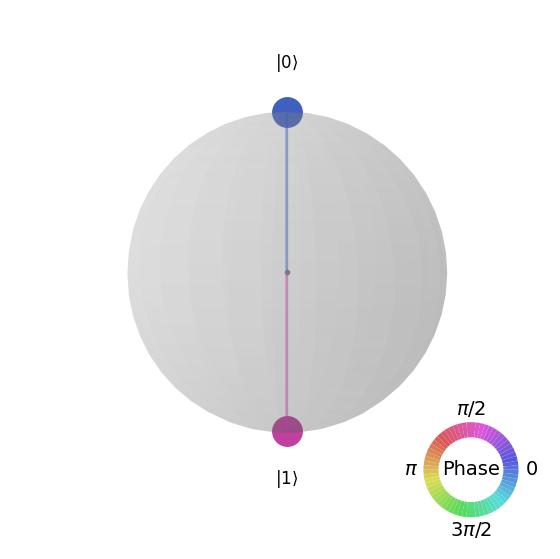


Estado |i-⟩ - Fase 270°:


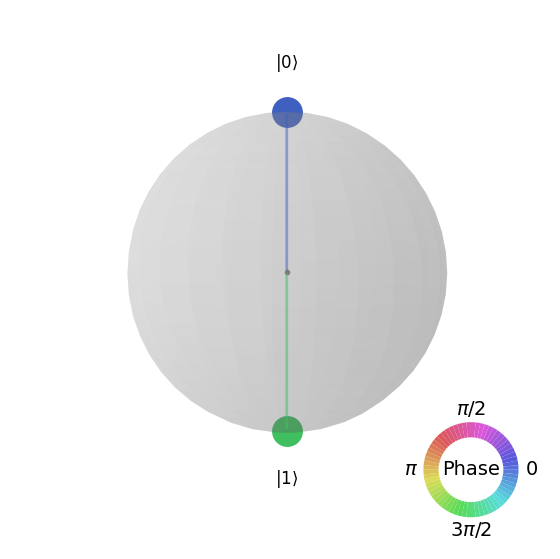


No Q-Sphere, observe a mudança de cores indicando diferentes fases.


In [5]:
# Visualizar os mesmos estados no Q-Sphere
print("Estado |+⟩ - Fase 0°:")
display(plot_state_qsphere(state_plus))

print("\nEstado |-⟩ - Fase 180°:")
display(plot_state_qsphere(state_minus))

print("\nEstado |i+⟩ - Fase 90°:")
display(plot_state_qsphere(state_i_plus))

print("\nEstado |i-⟩ - Fase 270°:")
display(plot_state_qsphere(state_i_minus))

print("\nNo Q-Sphere, observe a mudança de cores indicando diferentes fases.")

### 🧪 Experimento Interativo: Crie seu próprio estado com fase!

Modifique o ângulo θ abaixo para criar diferentes estados de superposição com fases variadas:

### 📊 Resumo: Por que a Fase é Importante?

| Conceito | Observável? | Importância |
|----------|-------------|-------------|
| **Fase Global** | ❌ Não | Irrelevante matematicamente |
| **Fase Relativa** | ✅ Sim (através de interferência) | Essencial para algoritmos quânticos |
| **Porta Z** | Modifica fase | Inverte fase de \|1⟩ (180°) |
| **Porta S** | Modifica fase | Adiciona 90° de fase a \|1⟩ |
| **Porta T** | Modifica fase | Adiciona 45° de fase a \|1⟩ |

A fase quântica é fundamental para:
- 🔄 **Interferência quântica**: Estados podem interferir construtivamente ou destrutivamente
- 🎯 **Algoritmos quânticos**: Grover, Shor, e outros dependem de manipulação precisa de fases
- 🔗 **Emaranhamento**: Estados emaranhados têm relações de fase específicas
- ⚡ **Phase Kickback**: Técnica usada em oráculos quânticos (veremos em notebooks avançados)

Estado criado: |ψ⟩ = 1/√2 (|0⟩ + e^(i·45°)|1⟩)
Componente |0⟩: (0.7071067811865475+0j)
Componente |1⟩: (0.5+0.5j)
Fase relativa: 45°

Esfera de Bloch - Fase θ = 45°:


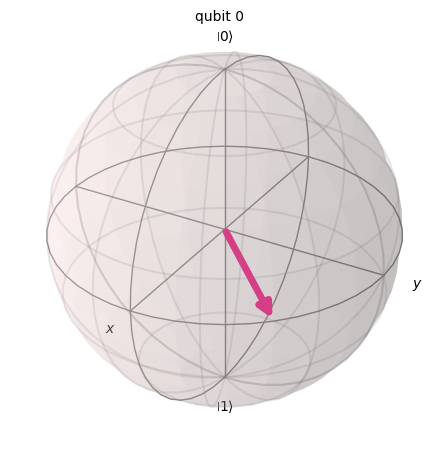


Q-Sphere - Fase θ = 45°:


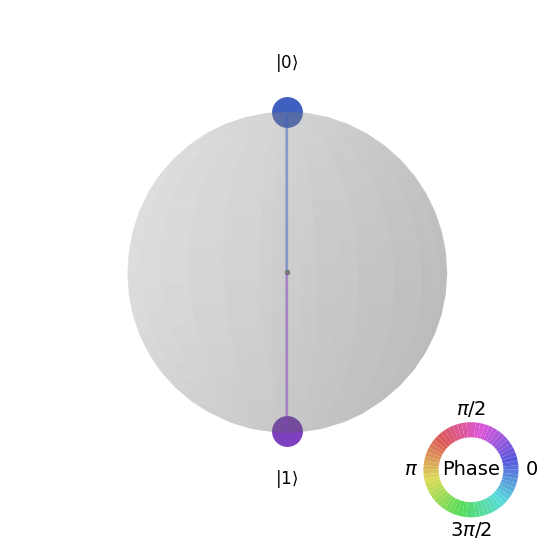

In [6]:
# Experimente diferentes valores de theta (em graus)
theta_graus = 45  # Modifique este valor: 0, 45, 90, 135, 180, 225, 270, 315...
theta_rad = np.deg2rad(theta_graus)

# Criar estado com fase customizada
estado_custom = Statevector([1/np.sqrt(2), np.exp(1j * theta_rad)/np.sqrt(2)])

# Mostrar o estado matematicamente
print(f"Estado criado: |ψ⟩ = 1/√2 (|0⟩ + e^(i·{theta_graus}°)|1⟩)")
print(f"Componente |0⟩: {estado_custom.data[0]}")
print(f"Componente |1⟩: {estado_custom.data[1]}")
print(f"Fase relativa: {theta_graus}°\n")

# Visualizar na Esfera de Bloch
print(f"Esfera de Bloch - Fase θ = {theta_graus}°:")
display(plot_bloch_multivector(estado_custom))

# Visualizar no Q-Sphere
print(f"\nQ-Sphere - Fase θ = {theta_graus}°:")
display(plot_state_qsphere(estado_custom))  


---

## 🔄 Portas de Rotação Parametrizadas

Até agora vimos portas com ângulos fixos (Z = 180°, S = 90°, T = 45°). Mas em muitos algoritmos quânticos — especialmente em **Machine Learning Quântico** e **Circuitos Variacionais** — precisamos de portas que aceitem **qualquer ângulo θ como parâmetro**.

Essas são as **portas de rotação parametrizadas**: **RX(θ)**, **RY(θ)** e **RZ(θ)**.

### 🎯 Por que são importantes?

- **VQC (Variational Quantum Classifier)**: Usa RY e RZ para codificar dados clássicos em estados quânticos
- **Ansatz variacional**: RY é a porta mais comum em ansatz como `RealAmplitudes`
- **Otimização quântica**: Os ângulos θ são ajustados iterativamente para minimizar uma função custo
- **Controle fino**: Permitem explorar qualquer ponto na Esfera de Bloch

### 📐 As Três Portas de Rotação

Cada porta rotaciona o qubit em torno de um eixo da Esfera de Bloch:

| Porta | Eixo de Rotação | Matriz | Uso Comum |
|-------|----------------|--------|-----------|
| **RX(θ)** | Eixo X | $\begin{bmatrix} \cos(\frac{\theta}{2}) & -i\sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}$ | Rotações no plano YZ |
| **RY(θ)** | Eixo Y | $\begin{bmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{bmatrix}$ | Codificação de dados, Ansatz |
| **RZ(θ)** | Eixo Z | $\begin{bmatrix} e^{-i\frac{\theta}{2}} & 0 \\ 0 & e^{i\frac{\theta}{2}} \end{bmatrix}$ | Ajuste de fase, Feature Maps |

**Observação importante:** O ângulo nas matrizes é **θ/2** (metade do ângulo de rotação na Esfera de Bloch). Isso é uma convenção da mecânica quântica relacionada ao grupo SU(2).

In [7]:
# Definir as portas de rotação parametrizadas
import numpy as np
import sympy as sp
from sympy import Matrix, symbols, cos, sin, exp, I, pi, latex
from IPython.display import display, Markdown

# Definir o símbolo theta
theta = symbols('theta', real=True)

# Porta RX(θ) - Rotação em torno do eixo X
RX = Matrix([
    [cos(theta/2), -I*sin(theta/2)],
    [-I*sin(theta/2), cos(theta/2)]
])

# Porta RY(θ) - Rotação em torno do eixo Y  
RY = Matrix([
    [cos(theta/2), -sin(theta/2)],
    [sin(theta/2), cos(theta/2)]
])

# Porta RZ(θ) - Rotação em torno do eixo Z
RZ = Matrix([
    [exp(-I*theta/2), 0],
    [0, exp(I*theta/2)]
])

display(Markdown(f"### Matrizes das Portas de Rotação"))
display(Markdown(f"**RX(θ)** - Rotação no eixo X:"))
display(Markdown(f"$$ RX(\\theta) = {latex(RX)} $$"))
display(Markdown(f"**RY(θ)** - Rotação no eixo Y:"))
display(Markdown(f"$$ RY(\\theta) = {latex(RY)} $$"))
display(Markdown(f"**RZ(θ)** - Rotação no eixo Z:"))
display(Markdown(f"$$ RZ(\\theta) = {latex(RZ)} $$"))

### Matrizes das Portas de Rotação

**RX(θ)** - Rotação no eixo X:

$$ RX(\theta) = \left[\begin{matrix}\cos{\left(\frac{\theta}{2} \right)} & - i \sin{\left(\frac{\theta}{2} \right)}\\- i \sin{\left(\frac{\theta}{2} \right)} & \cos{\left(\frac{\theta}{2} \right)}\end{matrix}\right] $$

**RY(θ)** - Rotação no eixo Y:

$$ RY(\theta) = \left[\begin{matrix}\cos{\left(\frac{\theta}{2} \right)} & - \sin{\left(\frac{\theta}{2} \right)}\\\sin{\left(\frac{\theta}{2} \right)} & \cos{\left(\frac{\theta}{2} \right)}\end{matrix}\right] $$

**RZ(θ)** - Rotação no eixo Z:

$$ RZ(\theta) = \left[\begin{matrix}e^{- \frac{i \theta}{2}} & 0\\0 & e^{\frac{i \theta}{2}}\end{matrix}\right] $$

### 🔬 Exemplo 1: Porta RY - A mais usada em Machine Learning

A porta **RY(θ)** é especialmente importante porque:
- Não introduz números complexos (apenas senos e cossenos reais)
- É a porta padrão no ansatz `RealAmplitudes` do Qiskit
- Permite mapear diretamente dados clássicos em ângulos quânticos

Vamos aplicar RY com diferentes ângulos ao estado |0⟩:

PORTA RY: Rotação em torno do eixo Y

0° (θ = 0.0000 rad):
  RY(0.0000)|0⟩ = 1.0000+0.0000j|0⟩ + 0.0000+0.0000j|1⟩
  Probabilidades: P(0) = 1.0000, P(1) = 0.0000

45° (θ = 0.7854 rad):
  RY(0.7854)|0⟩ = 0.9239+0.0000j|0⟩ + 0.3827+0.0000j|1⟩
  Probabilidades: P(0) = 0.8536, P(1) = 0.1464

90° (θ = 1.5708 rad):
  RY(1.5708)|0⟩ = 0.7071+0.0000j|0⟩ + 0.7071+0.0000j|1⟩
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

135° (θ = 2.3562 rad):
  RY(2.3562)|0⟩ = 0.3827+0.0000j|0⟩ + 0.9239+0.0000j|1⟩
  Probabilidades: P(0) = 0.1464, P(1) = 0.8536

180° (θ = 3.1416 rad):
  RY(3.1416)|0⟩ = 0.0000+0.0000j|0⟩ + 1.0000+0.0000j|1⟩
  Probabilidades: P(0) = 0.0000, P(1) = 1.0000


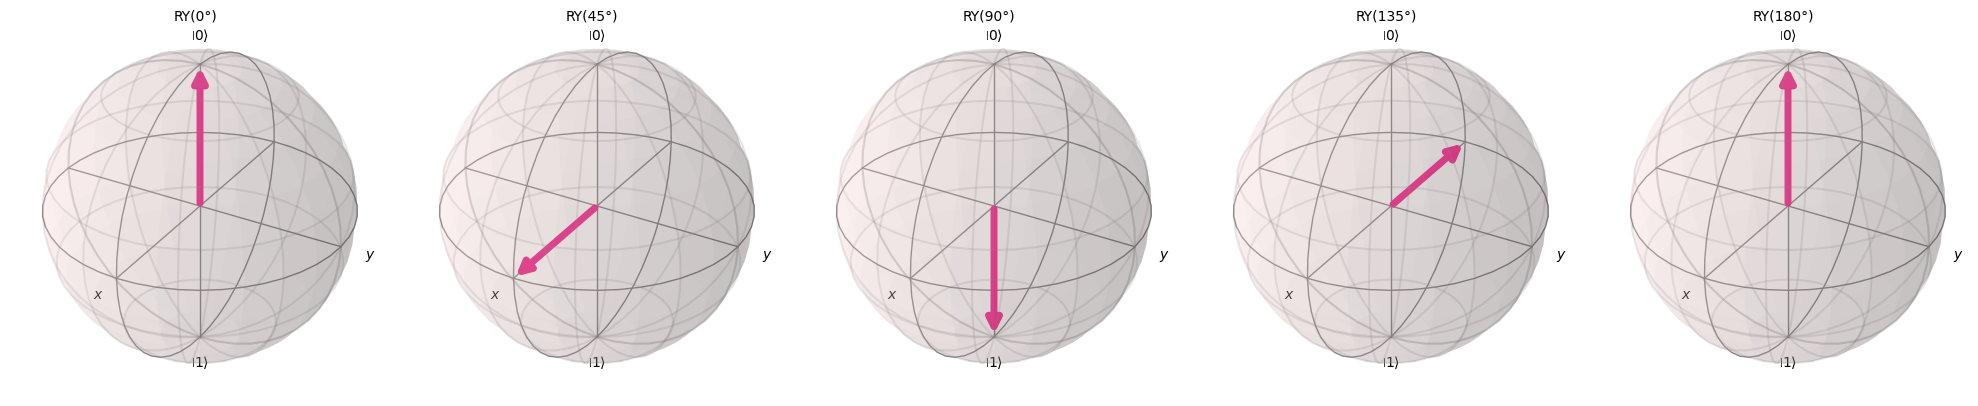


Observações:
  • RY(0°) = |0⟩ (polo norte)
  • RY(90°) = |+⟩ (equador)
  • RY(180°) = |1⟩ (polo sul)
  • Todos os estados estão no plano XZ (y = 0)


In [8]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Testar RY com diferentes ângulos
angulos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
nomes = ['0°', '45°', '90°', '135°', '180°']

print("=" * 70)
print("PORTA RY: Rotação em torno do eixo Y")
print("=" * 70)

fig, axes = plt.subplots(1, 5, figsize=(20, 4), subplot_kw={'projection': '3d'})

for i, (angulo, nome) in enumerate(zip(angulos, nomes)):
    # Criar circuito
    qc = QuantumCircuit(1)
    qc.ry(angulo, 0)
    
    # Obter estado
    state = Statevector(qc)
    
    # Calcular amplitudes
    alpha = state.data[0]
    beta = state.data[1]
    
    print(f"\n{nome} (θ = {angulo:.4f} rad):")
    print(f"  RY({angulo:.4f})|0⟩ = {alpha:.4f}|0⟩ + {beta:.4f}|1⟩")
    print(f"  Probabilidades: P(0) = {abs(alpha)**2:.4f}, P(1) = {abs(beta)**2:.4f}")
    
    # Plotar na Esfera de Bloch
    from qiskit.visualization import plot_bloch_vector
    
    # Converter estado em coordenadas de Bloch
    theta_bloch = 2 * angulo  # Dobrar o ângulo para coordenadas de Bloch
    x = np.sin(theta_bloch)
    y = 0  # RY mantém y=0 (rotação no plano XZ)
    z = np.cos(theta_bloch)
    
    plot_bloch_vector([x, y, z], ax=axes[i], title=f'RY({nome})')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Observações:")
print("  • RY(0°) = |0⟩ (polo norte)")
print("  • RY(90°) = |+⟩ (equador)")  
print("  • RY(180°) = |1⟩ (polo sul)")
print("  • Todos os estados estão no plano XZ (y = 0)")
print("=" * 70)

### 🔬 Exemplo 2: Porta RZ - Controlando Fases

A porta **RZ(θ)** modifica apenas a **fase** do qubit, sem alterar as probabilidades. É essencial para:
- Feature Maps (como `ZZFeatureMap`)
- Algoritmos de fase quântica
- Controle fino de interferência

Diferente de RY, RZ **não muda a posição vertical** na Esfera de Bloch, apenas **rotaciona em torno do eixo Z**:

PORTA RZ: Rotação em torno do eixo Z (afeta apenas a fase)

Estado inicial: |+⟩ = H|0⟩
  |+⟩ = 0.7071+0.0000j|0⟩ + 0.7071+0.0000j|1⟩

0° (θ = 0.0000 rad):
  RZ(0.0000)|+⟩ = 0.7071+0.0000j|0⟩ + 0.7071+0.0000j|1⟩
  Fase de |1⟩: 0.00°
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

90° (θ = 1.5708 rad):
  RZ(1.5708)|+⟩ = 0.5000-0.5000j|0⟩ + 0.5000+0.5000j|1⟩
  Fase de |1⟩: 45.00°
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

180° (θ = 3.1416 rad):
  RZ(3.1416)|+⟩ = 0.0000-0.7071j|0⟩ + 0.0000+0.7071j|1⟩
  Fase de |1⟩: 90.00°
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

270° (θ = 4.7124 rad):
  RZ(4.7124)|+⟩ = -0.5000-0.5000j|0⟩ + -0.5000+0.5000j|1⟩
  Fase de |1⟩: 135.00°
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

360° (θ = 6.2832 rad):
  RZ(6.2832)|+⟩ = -0.7071-0.0000j|0⟩ + -0.7071+0.0000j|1⟩
  Fase de |1⟩: 180.00°
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000


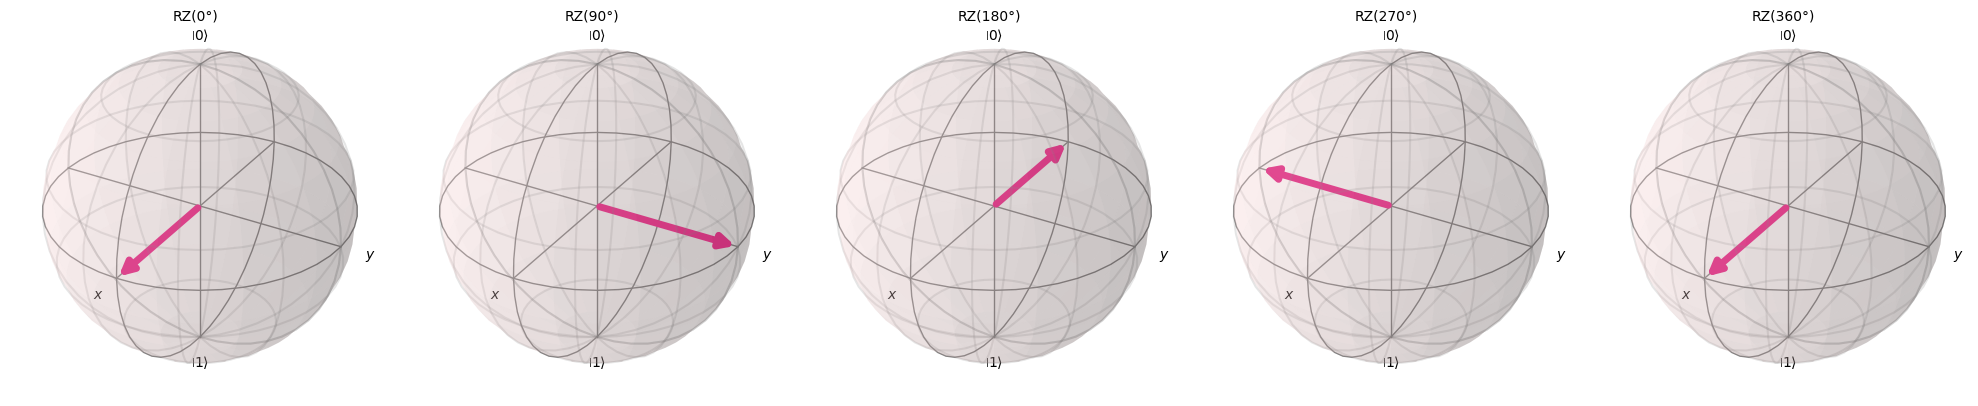


Observações importantes:
  • As PROBABILIDADES não mudam (sempre 50%-50%)
  • O qubit permanece no EQUADOR da esfera
  • Apenas a FASE (direção no equador) muda
  • RZ(0°) = |+⟩, RZ(180°) = |-⟩


In [9]:
# Demonstração: RZ aplicado a |+⟩
print("=" * 70)
print("PORTA RZ: Rotação em torno do eixo Z (afeta apenas a fase)")
print("=" * 70)

# Primeiro criar |+⟩
qc_base = QuantumCircuit(1)
qc_base.h(0)  # Hadamard cria |+⟩
state_plus = Statevector(qc_base)

print("\nEstado inicial: |+⟩ = H|0⟩")
print(f"  |+⟩ = {state_plus.data[0]:.4f}|0⟩ + {state_plus.data[1]:.4f}|1⟩")

# Testar RZ com diferentes ângulos
angulos_rz = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
nomes_rz = ['0°', '90°', '180°', '270°', '360°']

fig, axes = plt.subplots(1, 5, figsize=(20, 4), subplot_kw={'projection': '3d'})

for i, (angulo, nome) in enumerate(zip(angulos_rz, nomes_rz)):
    qc = QuantumCircuit(1)
    qc.h(0)  # Criar |+⟩
    qc.rz(angulo, 0)  # Aplicar RZ
    
    state = Statevector(qc)
    alpha = state.data[0]
    beta = state.data[1]
    
    # Fase do componente |1⟩
    fase_beta = np.angle(beta, deg=True)
    
    print(f"\n{nome} (θ = {angulo:.4f} rad):")
    print(f"  RZ({angulo:.4f})|+⟩ = {alpha:.4f}|0⟩ + {beta:.4f}|1⟩")
    print(f"  Fase de |1⟩: {fase_beta:.2f}°")
    print(f"  Probabilidades: P(0) = {abs(alpha)**2:.4f}, P(1) = {abs(beta)**2:.4f}")
    
    # Coordenadas de Bloch
    x = 2 * (alpha.conjugate() * beta).real
    y = 2 * (alpha.conjugate() * beta).imag
    z = abs(alpha)**2 - abs(beta)**2
    
    plot_bloch_vector([x, y, z], ax=axes[i], title=f'RZ({nome})')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Observações importantes:")
print("  • As PROBABILIDADES não mudam (sempre 50%-50%)")
print("  • O qubit permanece no EQUADOR da esfera")
print("  • Apenas a FASE (direção no equador) muda")
print("  • RZ(0°) = |+⟩, RZ(180°) = |-⟩")
print("=" * 70)

### 🔬 Exemplo 3: Porta RX - Completando o trio

A porta **RX(θ)** rotaciona em torno do eixo X. É menos comum que RY e RZ, mas ainda importante para:
- Criar estados em planos diferentes da Esfera de Bloch
- Algoritmos que precisam explorar todas as direções

Vamos ver RX em ação:

PORTA RX: Rotação em torno do eixo X

0° (θ = 0.0000 rad):
  RX(0.0000)|0⟩ = (1+0j)|0⟩ + 0j|1⟩
  Probabilidades: P(0) = 1.0000, P(1) = 0.0000

90° (θ = 1.5708 rad):
  RX(1.5708)|0⟩ = (0.7071067811865476+0j)|0⟩ + -0.7071067811865476j|1⟩
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000

180° (θ = 3.1416 rad):
  RX(3.1416)|0⟩ = (6.123233995736766e-17+0j)|0⟩ + -1j|1⟩
  Probabilidades: P(0) = 0.0000, P(1) = 1.0000

270° (θ = 4.7124 rad):
  RX(4.7124)|0⟩ = (-0.7071067811865475+0j)|0⟩ + -0.7071067811865476j|1⟩
  Probabilidades: P(0) = 0.5000, P(1) = 0.5000


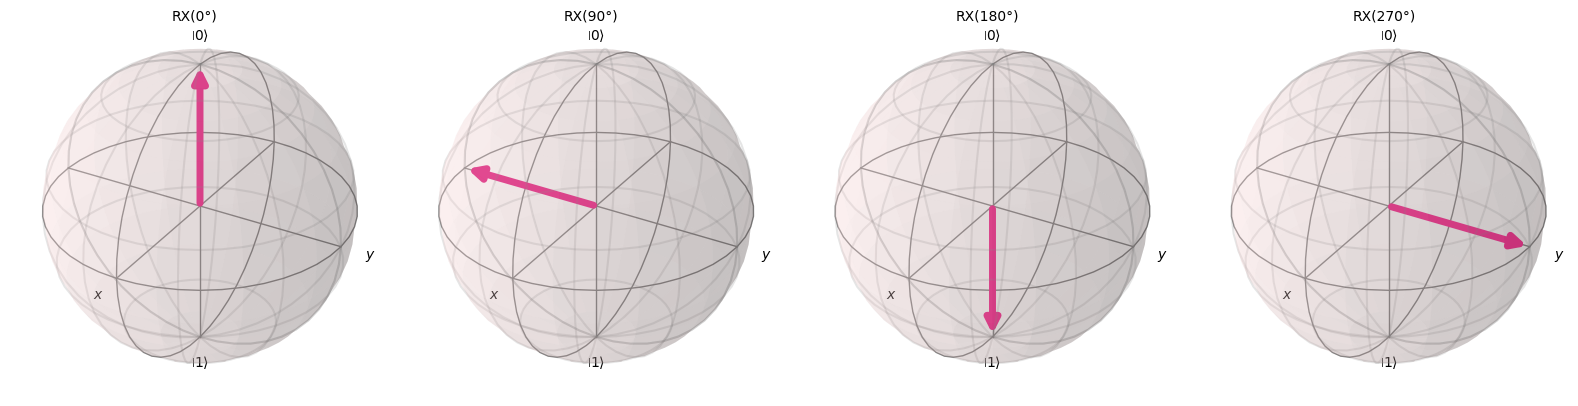


Observações:
  • RX rotaciona no plano YZ
  • RX(90°) cria superposição com números complexos
  • RX(180°) = X (porta NOT)


In [10]:
print("=" * 70)
print("PORTA RX: Rotação em torno do eixo X")
print("=" * 70)

angulos_rx = [0, np.pi/2, np.pi, 3*np.pi/2]
nomes_rx = ['0°', '90°', '180°', '270°']

fig, axes = plt.subplots(1, 4, figsize=(16, 4), subplot_kw={'projection': '3d'})

for i, (angulo, nome) in enumerate(zip(angulos_rx, nomes_rx)):
    qc = QuantumCircuit(1)
    qc.rx(angulo, 0)
    
    state = Statevector(qc)
    alpha = state.data[0]
    beta = state.data[1]
    
    print(f"\n{nome} (θ = {angulo:.4f} rad):")
    print(f"  RX({angulo:.4f})|0⟩ = {alpha}|0⟩ + {beta}|1⟩")
    print(f"  Probabilidades: P(0) = {abs(alpha)**2:.4f}, P(1) = {abs(beta)**2:.4f}")
    
    # Coordenadas de Bloch
    x = 2 * (alpha.conjugate() * beta).real
    y = 2 * (alpha.conjugate() * beta).imag
    z = abs(alpha)**2 - abs(beta)**2
    
    plot_bloch_vector([x, y, z], ax=axes[i], title=f'RX({nome})')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("Observações:")
print("  • RX rotaciona no plano YZ")
print("  • RX(90°) cria superposição com números complexos")
print("  • RX(180°) = X (porta NOT)")
print("=" * 70)

### 🛠️ Implementação Manual das Portas de Rotação

Vamos implementar as portas de rotação usando apenas NumPy. Isso ajuda a entender como elas realmente funcionam "por baixo dos panos":

**Lembre-se:** As matrizes usam **θ/2** (metade do ângulo), então para uma rotação de 90° na Esfera de Bloch, passamos θ = π/2 rad (45° nas matrizes).

In [12]:
import numpy as np

# Implementação manual das portas de rotação parametrizadas
def rx_gate(theta):
    """Porta RX(θ) - Rotação em torno do eixo X"""
    return np.array([
        [np.cos(theta/2), -1j*np.sin(theta/2)],
        [-1j*np.sin(theta/2), np.cos(theta/2)]
    ])

def ry_gate(theta):
    """Porta RY(θ) - Rotação em torno do eixo Y"""
    return np.array([
        [np.cos(theta/2), -np.sin(theta/2)],
        [np.sin(theta/2), np.cos(theta/2)]
    ])

def rz_gate(theta):
    """Porta RZ(θ) - Rotação em torno do eixo Z"""
    return np.array([
        [np.exp(-1j*theta/2), 0],
        [0, np.exp(1j*theta/2)]
    ])

# Estados básicos
ket_0 = np.array([[1], [0]])
ket_1 = np.array([[0], [1]])

print("=" * 70)
print("IMPLEMENTAÇÃO MANUAL DAS PORTAS DE ROTAÇÃO")
print("=" * 70)

# Testar RY com θ = π/2 (90° na Esfera de Bloch)
theta = np.pi / 2
print(f"\n🔹 Testando RY({theta:.4f}) em |0⟩:")
print(f"   Ângulo: π/2 = 90° na Esfera de Bloch")

RY = ry_gate(theta)
state_ry = RY.dot(ket_0)

print(f"\n   Matriz RY(π/2):")
print(f"   {RY[0]}")
print(f"   {RY[1]}")

print(f"\n   RY(π/2)|0⟩ = {state_ry[0][0]:.4f}|0⟩ + {state_ry[1][0]:.4f}|1⟩")
print(f"   Esperado: 1/√2|0⟩ + 1/√2|1⟩ = |+⟩")
print(f"   Probabilidades: P(0) = {abs(state_ry[0][0])**2:.4f}, P(1) = {abs(state_ry[1][0])**2:.4f}")

# Testar RZ com θ = π (180°)
print(f"\n🔹 Testando RZ(π) aplicado a |+⟩:")
print(f"   Ângulo: π = 180° na Esfera de Bloch")

# Primeiro criar |+⟩
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])  # Porta Hadamard
ket_plus = H.dot(ket_0)

RZ = rz_gate(np.pi)
state_rz = RZ.dot(ket_plus.reshape(2,1))

print(f"\n   Estado inicial: |+⟩ = {ket_plus[0][0]:.4f}|0⟩ + {ket_plus[1][0]:.4f}|1⟩")
print(f"\n   Matriz RZ(π):")
print(f"   {RZ[0]}")
print(f"   {RZ[1]}")

# Simplificar a fase global e^(-iπ/2) = -i
phase_global = np.exp(-1j*np.pi/2)
state_rz_simplified = state_rz / phase_global

print(f"\n   RZ(π)|+⟩ = {state_rz[0][0]:.4f}|0⟩ + {state_rz[1][0]:.4f}|1⟩")
print(f"   Removendo fase global: ≈ {state_rz_simplified[0][0]:.4f}|0⟩ + {state_rz_simplified[1][0]:.4f}|1⟩")
print(f"   Esperado: 1/√2|0⟩ - 1/√2|1⟩ = |-⟩")
print(f"   ✅ RZ(π) = Z (porta Z é caso especial de RZ)")

# Testar RX com θ = π (180° = porta X)
print(f"\n🔹 Testando RX(π) em |0⟩:")
print(f"   Ângulo: π = 180° na Esfera de Bloch")

RX = rx_gate(np.pi)
state_rx = RX.dot(ket_0)

# Remover fase global -i
state_rx_real = state_rx / (-1j)

print(f"\n   Matriz RX(π):")
print(f"   {RX[0]}")
print(f"   {RX[1]}")

print(f"\n   RX(π)|0⟩ = {state_rx[0][0]}|0⟩ + {state_rx[1][0]}|1⟩")
print(f"   Removendo fase global: ≈ {state_rx_real[0][0]:.4f}|0⟩ + {state_rx_real[1][0]:.4f}|1⟩")
print(f"   Esperado: |1⟩")
print(f"   ✅ RX(π) = X (porta X é caso especial de RX)")

# Verificar casos especiais
print("\n" + "=" * 70)
print("CASOS ESPECIAIS (relação com portas fixas):")
print("=" * 70)

# Porta Z
Z = np.array([[1, 0], [0, -1]])
RZ_pi = rz_gate(np.pi)
# Remover fase global
RZ_pi_simplified = RZ_pi / np.exp(-1j*np.pi/2)
print(f"\nZ vs RZ(π):")
print(f"  Z =     {Z[0]}  {Z[1]}")
print(f"  RZ(π) = {RZ_pi_simplified[0]}  {RZ_pi_simplified[1]}")
print(f"  ✅ Equivalentes (a menos de fase global)")

# Porta S
S = np.array([[1, 0], [0, 1j]])
RZ_pi_2 = rz_gate(np.pi/2)
# Remover fase global
RZ_pi_2_simplified = RZ_pi_2 / np.exp(-1j*np.pi/4)
print(f"\nS vs RZ(π/2):")
print(f"  S =       {S[0]}  {S[1]}")
print(f"  RZ(π/2) = {RZ_pi_2_simplified[0]}  {RZ_pi_2_simplified[1]}")
print(f"  ✅ Equivalentes (a menos de fase global)")

# Porta X
X = np.array([[0, 1], [1, 0]])
RX_pi = rx_gate(np.pi)
RX_pi_simplified = RX_pi / (-1j)
print(f"\nX vs RX(π):")
print(f"  X =     {X[0]}  {X[1]}")
print(f"  RX(π) = {RX_pi_simplified[0]}  {RX_pi_simplified[1]}")
print(f"  ✅ Equivalentes (a menos de fase global)")

print("\n" + "=" * 70)
print("💡 CONCLUSÃO:")
print("   As portas fixas (X, Z, S, T) são casos especiais das portas")
print("   de rotação parametrizadas com ângulos específicos!")
print("=" * 70)

IMPLEMENTAÇÃO MANUAL DAS PORTAS DE ROTAÇÃO

🔹 Testando RY(1.5708) em |0⟩:
   Ângulo: π/2 = 90° na Esfera de Bloch

   Matriz RY(π/2):
   [ 0.70710678 -0.70710678]
   [0.70710678 0.70710678]

   RY(π/2)|0⟩ = 0.7071|0⟩ + 0.7071|1⟩
   Esperado: 1/√2|0⟩ + 1/√2|1⟩ = |+⟩
   Probabilidades: P(0) = 0.5000, P(1) = 0.5000

🔹 Testando RZ(π) aplicado a |+⟩:
   Ângulo: π = 180° na Esfera de Bloch

   Estado inicial: |+⟩ = 0.7071|0⟩ + 0.7071|1⟩

   Matriz RZ(π):
   [6.123234e-17-1.j 0.000000e+00+0.j]
   [0.000000e+00+0.j 6.123234e-17+1.j]

   RZ(π)|+⟩ = 0.0000-0.7071j|0⟩ + 0.0000+0.7071j|1⟩
   Removendo fase global: ≈ 0.7071-0.0000j|0⟩ + -0.7071+0.0000j|1⟩
   Esperado: 1/√2|0⟩ - 1/√2|1⟩ = |-⟩
   ✅ RZ(π) = Z (porta Z é caso especial de RZ)

🔹 Testando RX(π) em |0⟩:
   Ângulo: π = 180° na Esfera de Bloch

   Matriz RX(π):
   [ 6.123234e-17+0.j -0.000000e+00-1.j]
   [-0.000000e+00-1.j  6.123234e-17+0.j]

   RX(π)|0⟩ = (6.123233995736766e-17+0j)|0⟩ + -1j|1⟩
   Removendo fase global: ≈ -0.0000+0.0000j|0⟩

### 🎯 Aplicação Prática: Codificação de Dados Clássicos

Uma das aplicações mais importantes de RY e RZ é **codificar dados clássicos em estados quânticos**. Vamos ver um exemplo simples:

Suponha que você tem um dado clássico `x = 0.5` (normalizado entre 0 e 1) e quer codificá-lo em um qubit. Você pode usar:

```python
theta = 2 * np.pi * x  # Mapear [0,1] → [0, 2π]
qc.ry(theta, 0)        # Aplicar rotação RY
```

Vamos testar com diferentes valores:

CODIFICAÇÃO DE DADOS CLÁSSICOS EM QUBITS

Dado clássico: x = 0.00
  Ângulo: θ = 2π × 0.00 = 0.0000 rad (0.0°)
  Estado: 1.0000+0.0000j|0⟩ + 0.0000+0.0000j|1⟩
  P(medir 1) = 0.0000

Dado clássico: x = 0.25
  Ângulo: θ = 2π × 0.25 = 1.5708 rad (90.0°)
  Estado: 0.7071+0.0000j|0⟩ + 0.7071+0.0000j|1⟩
  P(medir 1) = 0.5000

Dado clássico: x = 0.50
  Ângulo: θ = 2π × 0.50 = 3.1416 rad (180.0°)
  Estado: 0.0000+0.0000j|0⟩ + 1.0000+0.0000j|1⟩
  P(medir 1) = 1.0000

Dado clássico: x = 0.75
  Ângulo: θ = 2π × 0.75 = 4.7124 rad (270.0°)
  Estado: -0.7071+0.0000j|0⟩ + 0.7071+0.0000j|1⟩
  P(medir 1) = 0.5000

Dado clássico: x = 1.00
  Ângulo: θ = 2π × 1.00 = 6.2832 rad (360.0°)
  Estado: -1.0000+0.0000j|0⟩ + 0.0000+0.0000j|1⟩
  P(medir 1) = 0.0000


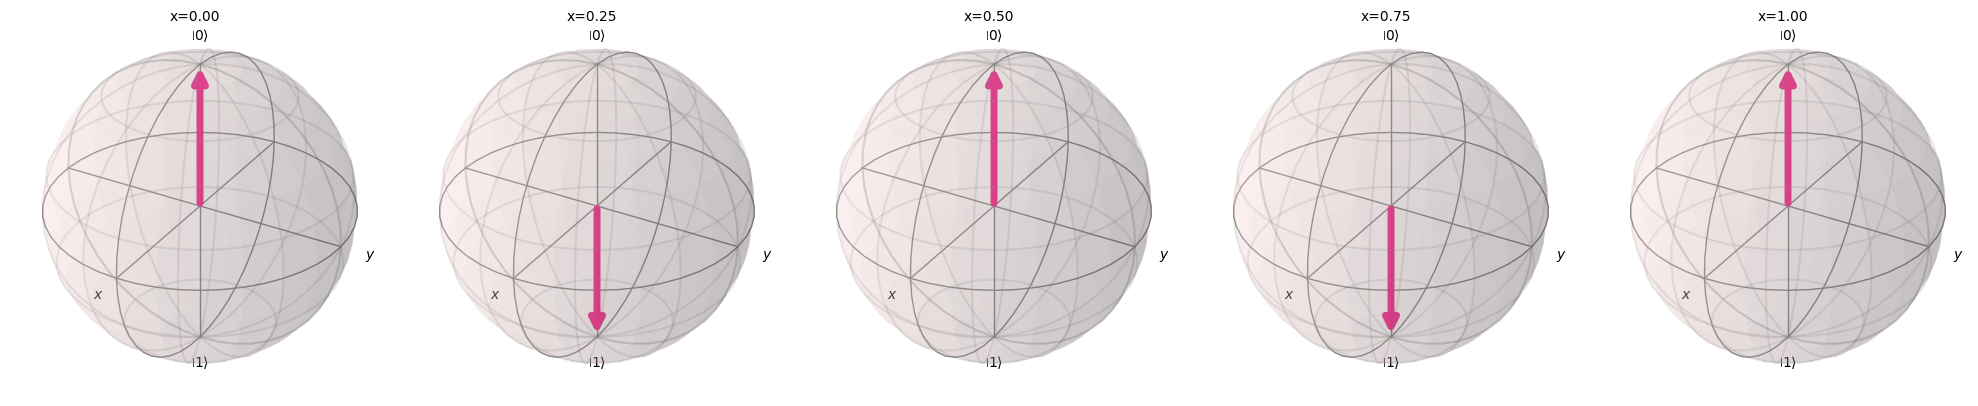


💡 Interpretação:
   Dados diferentes → Ângulos diferentes → Estados quânticos diferentes
   Assim, codificamos informação clássica em superposições quânticas!


In [ ]:
# Importações necessárias para esta célula
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
import numpy as np

print("=" * 70)
print("CODIFICAÇÃO DE DADOS CLÁSSICOS EM QUBITS")
print("=" * 70)

# Dados clássicos normalizados
dados_classicos = [0.0, 0.25, 0.5, 0.75, 1.0]

fig, axes = plt.subplots(1, 5, figsize=(20, 4), subplot_kw={'projection': '3d'})

for i, x in enumerate(dados_classicos):
    # Mapear dado clássico para ângulo
    theta = 2 * np.pi * x
    
    # Criar circuito e aplicar RY
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    
    state = Statevector(qc)
    
    print(f"\nDado clássico: x = {x:.2f}")
    print(f"  Ângulo: θ = 2π × {x:.2f} = {theta:.4f} rad ({np.degrees(theta):.1f}°)")
    print(f"  Estado: {state.data[0]:.4f}|0⟩ + {state.data[1]:.4f}|1⟩")
    print(f"  P(medir 1) = {abs(state.data[1])**2:.4f}")
    
    # Visualizar
    theta_bloch = 2 * theta
    x_coord = np.sin(theta_bloch)
    y_coord = 0
    z_coord = np.cos(theta_bloch)
    
    plot_bloch_vector([x_coord, y_coord, z_coord], ax=axes[i], 
                     title=f'x={x:.2f}')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("💡 Interpretação:")
print("   Dados diferentes → Ângulos diferentes → Estados quânticos diferentes")
print("   Assim, codificamos informação clássica em superposições quânticas!")
print("=" * 70)

### 📊 Resumo: Portas de Rotação Parametrizadas

| Porta | Eixo | Afeta | Uso Principal | Exemplo |
|-------|------|-------|---------------|---------|
| **RX(θ)** | X | Amplitude + Fase | Rotações YZ | Criar \|i+⟩, \|i-⟩ |
| **RY(θ)** | Y | Amplitude (real) | **Ansatz, VQC** | Codificar dados |
| **RZ(θ)** | Z | Fase apenas | **Feature Maps** | ZZFeatureMap |

**Relação com portas fixas:**
- Z = RZ(π) — rotação de 180° em Z
- S = RZ(π/2) — rotação de 90° em Z
- T = RZ(π/4) — rotação de 45° em Z
- X = RX(π) — rotação de 180° em X (porta NOT)
- H ≠ rotação simples (combinação de rotações)

**Por que são essenciais para Machine Learning Quântico?**

1. **Parametrização**: Os ângulos θ são variáveis treináveis
2. **Expressividade**: Podem criar qualquer estado de 1 qubit
3. **Gradientes**: Permitem calcular derivadas para otimização
4. **Codificação**: Mapeiam features clássicas → amplitudes quânticas

Nos próximos notebooks, você verá essas portas em ação no **algoritmo de Grover** (interferência), **QFT** (fases), e especialmente no **VQC** (otimização de ângulos)!

---

## Porta Controlled PhaseGate (CP)

A porta CP (Controlled Phase) é uma porta lógica quântica que atua em dois qubits: um qubit de controle e um qubit alvo. A operação da porta CP é a seguinte:

- Se o qubit de controle estiver em |0⟩, o qubit alvo permanece inalterado.
- Se o qubit de controle estiver em |1⟩, a fase do qubit alvo é alterada por um ângulo específico φ (phi).

A porta CP é representada pela seguinte matriz:

$$
\text{CP}(φ) = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{iφ}
\end{bmatrix}
$$

Quando aplicamos a porta CP a um estado composto de dois qubits, o resultado depende do estado do qubit de controle. Por exemplo, se aplicarmos a porta CP ao estado |11⟩ (onde o primeiro qubit é o controle e o segundo é o alvo), o resultado será $e^{iφ}|11⟩$, pois o qubit de controle está em |1⟩, então a fase do qubit alvo é alterada por φ.

Por exemplo:
$$
\text{CP}(φ)|11⟩ =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{iφ}
\end{bmatrix} * 
\begin{bmatrix}
0 \\ 0 \\ 0 \\ 1
\end{bmatrix} =
\begin{bmatrix}
0 \\ 0 \\ 0 \\ e^{iφ}
\end{bmatrix} =
e^{iφ}|11⟩
$$

#### Usando a Porta CP com Numpy puro (sem Qiskit)

In [ ]:
# Implementação da porta CPHASE (Controlled-Phase)

def cphase_gate(theta):
    return np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, np.exp(1j * theta)]
    ])
    
# Testando a porta CPHASE com θ = π/2
theta = np.pi / 2
CPHASE = cphase_gate(theta)

# |11>
q_11 = np.array([
    [0],
    [0],
    [0],
    [1]
])

# Aplicando a porta CPHASE em |11>
novo_estado_cphase = np.dot(CPHASE, q_11)

print("\n--- Após aplicar a Porta CPHASE em |11> com θ=π/2 ---")
print(f"Esperamos e^(iπ/2)|11> = i|11>, obtivemos:\n{novo_estado_cphase}")
print("\n✅ A porta CPHASE funcionou como esperado! (aplicou a fase correta em |11>)")


--- Após aplicar a Porta CPHASE em |11> com θ=π/2 ---
Esperamos e^(iπ/2)|11> = i|11>, obtivemos:
[[0.000000e+00+0.j]
 [0.000000e+00+0.j]
 [0.000000e+00+0.j]
 [6.123234e-17+1.j]]

✅ A porta CPHASE funcionou como esperado! (aplicou a fase correta em |11>)


Vamos ver outro exemplo utilizando a esfera de Bloch para visualizar o efeito da porta CP em um sistema de dois qubits.

In [ ]:
# Visualização do efeito da Porta CPHASE nas Esferas de Bloch
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


Vamos criar o estado passo a passo para entender como ele aparece nas esferas de Bloch:

**O que queremos:**
- Qubit 1 (controle): estado |+⟩ → aparece no **equador** (direção +X)
- Qubit 0 (alvo): estado |1⟩ → aparece no **polo sul**

**Como fazer com `np.kron`:**

A função `np.kron(A, B)` em NumPy significa "produto tensorial A ⊗ B", onde:
- **A** = primeiro argumento → vira o **qubit mais significativo** (qubit 1 no Qiskit)
- **B** = segundo argumento → vira o **qubit menos significativo** (qubit 0 no Qiskit)

Portanto:
```python
np.kron(|+⟩, |1⟩)  →  qubit1 = |+⟩  e  qubit0 = |1⟩
```

**Na visualização Bloch:**
- **Esfera da ESQUERDA** = qubit 0 (menos significativo) = |1⟩ → **polo sul** ✓
- **Esfera da DIREITA** = qubit 1 (mais significativo) = |+⟩ → **equador +X** ✓

In [ ]:

# Parâmetro da porta (já definido no notebook): θ = π/2
theta = np.pi / 2
CP = cphase_gate(theta)

print("=" * 70)
print("CRIANDO O ESTADO QUÂNTICO DE 2 QUBITS")
print("=" * 70)

# Definir os estados individuais
estado_qubit1 = 1/np.sqrt(2) * np.array([1, 1])   # |+⟩ para qubit 1
estado_qubit0 = np.array([0, 1])                  # |1⟩ para qubit 0

print("\n1️⃣ Estado do qubit 1 (controle):")
print(f"   |+⟩ = 1/√2 (|0⟩ + |1⟩)")
print(f"   Vetor: {estado_qubit1}")
print("   → Na esfera de Bloch: equador, direção +X")

print("\n2️⃣ Estado do qubit 0 (alvo):")
print(f"   |1⟩")
print(f"   Vetor: {estado_qubit0}")
print("   → Na esfera de Bloch: polo sul")

# Criar o estado composto usando produto tensorial (Kronecker)
state_before = np.kron(estado_qubit1, estado_qubit0)
sv_before = Statevector(state_before)

print("\n3️⃣ Estado composto (produto tensorial):")
print(f"   np.kron(|+⟩, |1⟩) = |+⟩ ⊗ |1⟩")
display(Markdown(r"$$= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |11\rangle)$$"))

print("\n4️⃣ Vetor estado final (4 componentes):")
display(Markdown(r"""$$\begin{bmatrix}0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix} \begin{array}{l} \leftarrow |00\rangle \text{ (qubit1=0, qubit0=0)} \\ \leftarrow |01\rangle \text{ (qubit1=0, qubit0=1)} ✓ \\ \leftarrow |10\rangle \text{ (qubit1=1, qubit0=0)} \\ \leftarrow |11\rangle \text{ (qubit1=1, qubit0=1)} ✓ \end{array}$$"""))

print("\n💡 Interpretação:")
print("   • Componentes |01⟩ e |11⟩ têm amplitude 1/√2 (50% de probabilidade cada)")
print("   • Qubit 0 está SEMPRE em |1⟩ (polo sul)")
print("   • Qubit 1 está em superposição |+⟩ (equador +X)")
print("=" * 70)


CRIANDO O ESTADO QUÂNTICO DE 2 QUBITS

1️⃣ Estado do qubit 1 (controle):
   |+⟩ = 1/√2 (|0⟩ + |1⟩)
   Vetor: [0.70710678 0.70710678]
   → Na esfera de Bloch: equador, direção +X

2️⃣ Estado do qubit 0 (alvo):
   |1⟩
   Vetor: [0 1]
   → Na esfera de Bloch: polo sul

3️⃣ Estado composto (produto tensorial):
   np.kron(|+⟩, |1⟩) = |+⟩ ⊗ |1⟩


$$= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |1\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |11\rangle)$$


4️⃣ Vetor estado final (4 componentes):


$$\begin{bmatrix}0 \\ \frac{1}{\sqrt{2}} \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix} \begin{array}{l} \leftarrow |00\rangle \text{ (qubit1=0, qubit0=0)} \\ \leftarrow |01\rangle \text{ (qubit1=0, qubit0=1)} ✓ \\ \leftarrow |10\rangle \text{ (qubit1=1, qubit0=0)} \\ \leftarrow |11\rangle \text{ (qubit1=1, qubit0=1)} ✓ \end{array}$$


💡 Interpretação:
   • Componentes |01⟩ e |11⟩ têm amplitude 1/√2 (50% de probabilidade cada)
   • Qubit 0 está SEMPRE em |1⟩ (polo sul)
   • Qubit 1 está em superposição |+⟩ (equador +X)


Antes da CP (controle |+>, alvo |1>):


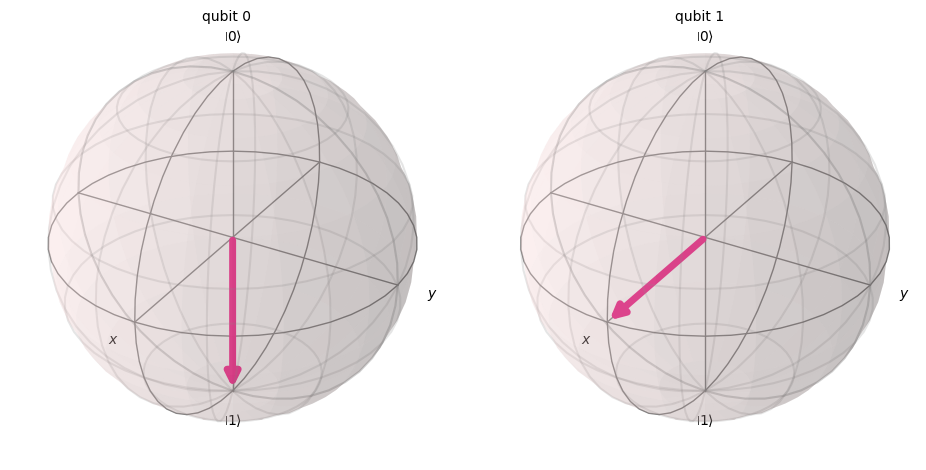

In [ ]:

print("Antes da CP (controle |+>, alvo |1>):")
display(plot_bloch_multivector(sv_before))


Depois da CP (θ = π/2):


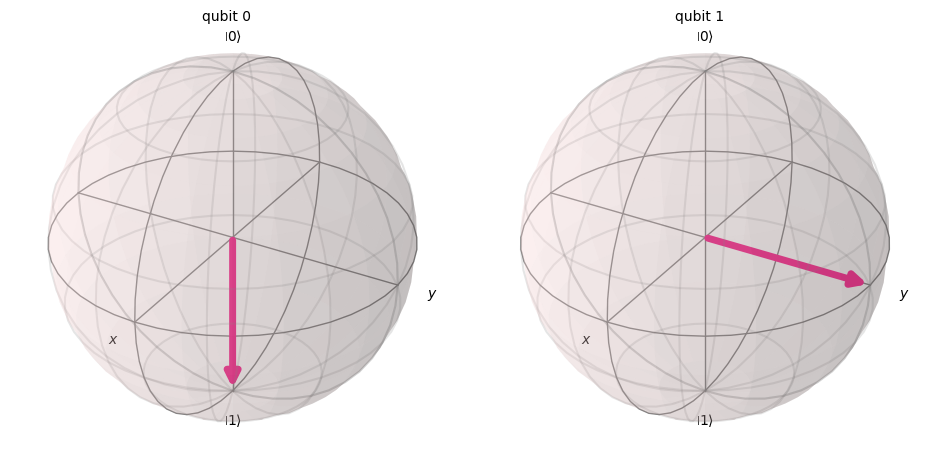

In [ ]:

# Aplicar CPHASE
state_after = CP.dot(state_before.reshape(4, 1)).flatten()
sv_after = Statevector(state_after)

print("Depois da CP (θ = π/2):")
display(plot_bloch_multivector(sv_after))


In [ ]:

# Análise numérica do estado reduzido do qubit alvo
psi_before = state_before.reshape((2, 2))    # formato (controle, alvo)
rho_target_before = np.conj(psi_before).T @ psi_before
psi_after = state_after.reshape((2, 2))
rho_target_after = np.conj(psi_after).T @ psi_after

def bloch_coords_from_rho(rho):
    r01 = rho[0,1]
    x = 2 * r01.real
    y = -2 * r01.imag
    z = rho[0,0].real - rho[1,1].real
    return x, y, z

x1, y1, z1 = bloch_coords_from_rho(rho_target_before)
x2, y2, z2 = bloch_coords_from_rho(rho_target_after)

print(f"\nQubit alvo - Bloch coords antes: x={x1:.3f}, y={y1:.3f}, z={z1:.3f}")
print(f"Qubit alvo - Bloch coords depois: x={x2:.3f}, y={y2:.3f}, z={z2:.3f}")

# Mostrar a mudança de fase na componente |11>
amp_11_before = state_before[3]
amp_11_after = state_after[3]
print(f"\nAmplitude |11> antes: {amp_11_before}, fase={np.angle(amp_11_before, deg=True):.2f}°")
print(f"Amplitude |11> depois: {amp_11_after}, fase={np.angle(amp_11_after, deg=True):.2f}°")


Qubit alvo - Bloch coords antes: x=0.000, y=-0.000, z=-1.000
Qubit alvo - Bloch coords depois: x=0.000, y=-0.000, z=-1.000

Amplitude |11> antes: 0.7071067811865475, fase=0.00°
Amplitude |11> depois: (4.329780281177466e-17+0.7071067811865475j), fase=90.00°


#### Usando a Porta CP com Qiskit

Até agora trabalhamos com NumPy e vetores de estado diretamente. Agora vamos ver como usar a porta **CP (Controlled-Phase)** no Qiskit, que é a biblioteca padrão para criar circuitos quânticos.

No Qiskit, a porta CP está disponível como `qc.cp(theta, control_qubit, target_qubit)`.

Circuito ANTES da porta CP:


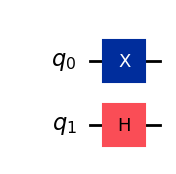

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

# Criar um circuito com 2 qubits
qc = QuantumCircuit(2)

# Preparar o estado inicial: qubit 1 em |+⟩ e qubit 0 em |1⟩
qc.h(1)      # Hadamard no qubit 1 para criar |+⟩
qc.x(0)      # Porta X no qubit 0 para criar |1⟩

print("Circuito ANTES da porta CP:")
display(qc.draw('mpl'))

# Salvar estado antes da CP
estado_antes_qiskit = Statevector(qc)

Circuito DEPOIS da porta CP:


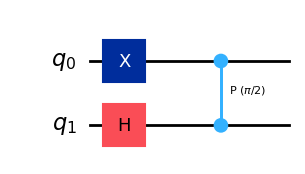

In [ ]:
# Aplicar a porta CP (Controlled-Phase) com θ = π/2
theta = np.pi / 2
qc.cp(theta, 1, 0)  # Porta CP: controle=qubit1, alvo=qubit0

print("Circuito DEPOIS da porta CP:")
display(qc.draw('mpl'))

# Obter o estado final
estado_depois_qiskit = Statevector(qc)

In [ ]:
# Comparar com o resultado NumPy anterior
print("="*70)
print("COMPARAÇÃO: NumPy vs Qiskit")
print("="*70)

# Formatação mais clara da comparação NumPy vs Qiskit
def state_markdown(vec, label):
    lines = [f"**{label}**  "]
    for idx, amp in enumerate(np.asarray(vec).flatten()):
        mag = abs(amp)
        ph = np.angle(amp, deg=True)
        lines.append(f"- |{idx:02b}> : amp = {mag:.6f} , fase = {ph:7.2f}° , valor = {amp}")
    return "  \n".join(lines)

display(Markdown("### 🔍 Comparação: NumPy vs Qiskit"))
display(Markdown(state_markdown(state_before, "Antes (NumPy)")))
display(Markdown(state_markdown(estado_antes_qiskit.data, "Antes (Qiskit)")))
maxdiff_before = np.max(np.abs(state_before - estado_antes_qiskit.data))
display(Markdown(f"**Diferença máxima (antes):** {maxdiff_before:.10e}"))

display(Markdown("---"))

display(Markdown(state_markdown(state_after, "Depois (NumPy)")))
display(Markdown(state_markdown(estado_depois_qiskit.data, "Depois (Qiskit)")))
maxdiff_after = np.max(np.abs(state_after - estado_depois_qiskit.data))
display(Markdown(f"**Diferença máxima (depois):** {maxdiff_after:.10e}"))

if np.allclose(state_before, estado_antes_qiskit.data, atol=1e-10) and np.allclose(state_after, estado_depois_qiskit.data, atol=1e-10):
    display(Markdown("✅ **Resultados idênticos dentro da tolerância numérica (atol=1e-10).**"))
else:
    display(Markdown("⚠️ **Diferenças detectadas — verifique tolerâncias e fases.**"))

# Resumo focalizado na componente |11>
idx = 3
phase_before = np.angle(state_before[idx], deg=True)
phase_after = np.angle(state_after[idx], deg=True)
display(Markdown(
    f"**Componente |11>:**  \n"
    f"- NumPy: amp = {abs(state_before[idx]):.6f}, fase = {phase_before:7.2f}°  \n"
    f"- Qiskit: amp = {abs(estado_depois_qiskit.data[idx]):.6f}, fase = {phase_after:7.2f}°"
))

COMPARAÇÃO: NumPy vs Qiskit


### 🔍 Comparação: NumPy vs Qiskit

**Antes (NumPy)**    
- |00> : amp = 0.000000 , fase =    0.00° , valor = 0.0  
- |01> : amp = 0.707107 , fase =    0.00° , valor = 0.7071067811865475  
- |10> : amp = 0.000000 , fase =    0.00° , valor = 0.0  
- |11> : amp = 0.707107 , fase =    0.00° , valor = 0.7071067811865475

**Antes (Qiskit)**    
- |00> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |01> : amp = 0.707107 , fase =    0.00° , valor = (0.7071067811865475+0j)  
- |10> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |11> : amp = 0.707107 , fase =    0.00° , valor = (0.7071067811865475+0j)

**Diferença máxima (antes):** 0.0000000000e+00

---

**Depois (NumPy)**    
- |00> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |01> : amp = 0.707107 , fase =    0.00° , valor = (0.7071067811865475+0j)  
- |10> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |11> : amp = 0.707107 , fase =   90.00° , valor = (4.329780281177466e-17+0.7071067811865475j)

**Depois (Qiskit)**    
- |00> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |01> : amp = 0.707107 , fase =    0.00° , valor = (0.7071067811865475+0j)  
- |10> : amp = 0.000000 , fase =    0.00° , valor = 0j  
- |11> : amp = 0.707107 , fase =   90.00° , valor = (4.329780281177466e-17+0.7071067811865475j)

**Diferença máxima (depois):** 0.0000000000e+00

✅ **Resultados idênticos dentro da tolerância numérica (atol=1e-10).**

**Componente |11>:**  
- NumPy: amp = 0.707107, fase =    0.00°  
- Qiskit: amp = 0.707107, fase =   90.00°

Estado final (após CP) usando Qiskit:


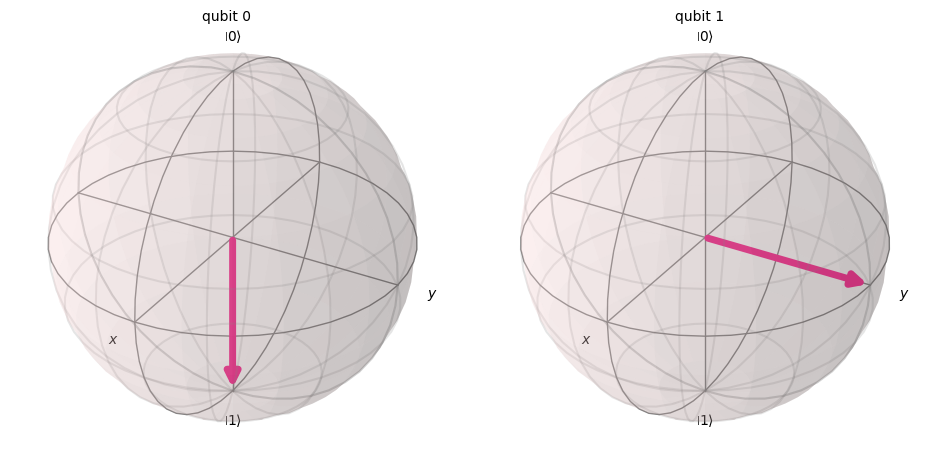


Amplitudes do estado final:
  |01⟩: amplitude = 0.7071, fase =    0.00°
  |11⟩: amplitude = 0.7071, fase =   90.00°


In [ ]:
# Visualizar o estado final nas esferas de Bloch
print("Estado final (após CP) usando Qiskit:")
display(plot_bloch_multivector(estado_depois_qiskit))

# Mostrar as amplitudes e fases
print("\nAmplitudes do estado final:")
for i, amp in enumerate(estado_depois_qiskit.data):
    if abs(amp) > 1e-10:
        fase_graus = np.angle(amp, deg=True)
        print(f"  |{i:02b}⟩: amplitude = {abs(amp):.4f}, fase = {fase_graus:7.2f}°")

#### 📝 Resumo: Porta CP no Qiskit

**Sintaxe:**
```python
qc.cp(theta, control_qubit, target_qubit)
```

**Parâmetros:**
- `theta`: ângulo de fase em radianos
- `control_qubit`: índice do qubit de controle
- `target_qubit`: índice do qubit alvo

**Efeito:**
- Se o qubit de controle estiver em |1⟩, adiciona fase `e^(iθ)` ao estado |11⟩
- Se o qubit de controle estiver em |0⟩, nada acontece

**Casos especiais:**
- `theta = π` → Porta CZ (Controlled-Z)
- `theta = π/2` → Porta CS (Controlled-S)
- `theta = π/4` → Porta CT (Controlled-T)

#### Uso futuro da Porta CP

Iremos entender a aplicação prática da porta CP em futuros notebooks, especialmente quando discutirmos algoritmos quânticos que utilizam fases para manipular estados quânticos de maneira eficiente. Mas, por enquanto, é importante compreender a definição e o funcionamento básico dessa porta quântica controlada, onde a fase do qubit alvo é alterada dependendo do estado do qubit de controle.